

### 1. **Primary Key**
A primary key is a unique identifier for a record in a table. It ensures that each record can be uniquely identified. A table can have only one primary key, which may consist of a single column or multiple columns (composite key).

**Example:**
```sql
CREATE TABLE emp (
    Eid INT PRIMARY KEY,
    empName VARCHAR(50),
    address VARCHAR(100),
    salary DECIMAL(10, 2)
);
```

### 2. **Composite Key**
A composite key is a primary key composed of two or more columns. It is used when a single column is not sufficient to uniquely identify records.

**Example:**
```sql
CREATE TABLE employee_project (
    empID INT,
    projectID INT,
    PRIMARY KEY (empID, projectID)
);
```

### 3. **Foreign Key**
A foreign key is a column or a set of columns in one table that refers to the primary key in another table. It establishes a relationship between the two tables and enforces referential integrity.

**Example:**
```sql
CREATE TABLE dept (
    Eid INT PRIMARY KEY,
    Dept VARCHAR(50),
    FOREIGN KEY (Eid) REFERENCES emp(Eid)
);
```

### 4. **Unique Key**
A unique key ensures that all values in a column are unique. Unlike the primary key, a table can have multiple unique keys. Unique keys can contain NULL values, but each NULL must be unique.

**Example:**
```sql
CREATE TABLE emp (
    Eid INT PRIMARY KEY,
    empName VARCHAR(50),
    email VARCHAR(100) UNIQUE
);
```

### 5. **Candidate Key**
A candidate key is a column or a set of columns that can uniquely identify any record in a table. Each table can have multiple candidate keys, but only one of them can be chosen as the primary key.

**Example:**
In the `emp` table, both `Eid` and `email` could be candidate keys if they are unique.

### 6. **Super Key**
A super key is a set of one or more columns that can be used to uniquely identify a record in a table. A super key can have additional attributes that are not necessary for unique identification.

**Example:**
In the `emp` table, the combination of (`Eid`, `empName`) is a super key if `Eid` is unique.

### 7. **Alternate Key**
An alternate key is any candidate key that is not chosen as the primary key. It is still capable of uniquely identifying records in a table.

**Example:**
If `Eid` is chosen as the primary key, then `email` would be an alternate key in the `emp` table.

### 8. **Composite Key (Redefining)**
Composite keys are used when a combination of multiple columns is required to create a unique identifier for the table, as seen in the example for the `employee_project` table above.




### Primary Key vs. Unique Key

**Primary Key:**
- **Purpose:** Uniquely identifies each record in a table.
- **Uniqueness:** All values must be unique.
- **Null Values:** Cannot contain NULL values.
- **Number per Table:** Only one primary key allowed per table.
- **Usage:** Often used as a reference in other tables (foreign keys).

**Unique Key:**
- **Purpose:** Ensures all values in a column (or combination of columns) are unique.
- **Uniqueness:** All values must be unique.
- **Null Values:** Can contain one or more NULL values.
- **Number per Table:** Multiple unique keys allowed per table.
- **Usage:** Used to enforce uniqueness on columns that are not the primary key.

### Example:

```sql
CREATE TABLE employees (
    empID INT PRIMARY KEY,
    email VARCHAR(100) UNIQUE
);
```

### Primary Key vs. Candidate Key

**Primary Key:**
- **Purpose:** A special candidate key chosen as the main unique identifier for a table.
- **Uniqueness:** All values must be unique.
- **Null Values:** Cannot contain NULL values.
- **Number per Table:** Only one primary key allowed per table.

**Candidate Key:**
- **Purpose:** Any column or combination of columns that can uniquely identify rows in a table.
- **Uniqueness:** All values must be unique.
- **Null Values:** Cannot contain NULL values.
- **Number per Table:** Multiple candidate keys possible.
- **Usage:** Any of the candidate keys could potentially be chosen as the primary key.

### Example:

```sql
CREATE TABLE employees (
    empID INT,
    email VARCHAR(100),
    phone VARCHAR(15),
    PRIMARY KEY (empID),
    UNIQUE (email),
    UNIQUE (phone)
);
```

Here, `email` and `phone` are candidate keys, but `empID` is chosen as the primary key.

### Primary Key vs. Composite Key

**Primary Key:**
- **Purpose:** Uniquely identifies each record in a table.
- **Columns:** Can be a single column or a combination of columns.
- **Null Values:** Cannot contain NULL values.
- **Usage:** The main unique identifier for a table.

**Composite Key:**
- **Purpose:** A primary key that consists of two or more columns.
- **Columns:** Always a combination of columns.
- **Null Values:** Cannot contain NULL values in any part of the composite key.
- **Usage:** Used when a single column is not sufficient to uniquely identify records.

### Example:

```sql
CREATE TABLE employee_project (
    empID INT,
    projectID INT,
    PRIMARY KEY (empID, projectID)
);
```

Here, the combination of `empID` and `projectID` uniquely identifies each record.

### Foreign Key vs. Primary Key

**Foreign Key:**
- **Purpose:** Creates a link between two tables.
- **Columns:** Refers to the primary key in another table.
- **Null Values:** Can contain NULL values if not part of a composite key.
- **Usage:** Enforces referential integrity between tables.

**Primary Key:**
- **Purpose:** Uniquely identifies each record in a table.
- **Columns:** Can be a single column or a combination of columns.
- **Null Values:** Cannot contain NULL values.
- **Usage:** The main unique identifier for a table.

### Example:

```sql
CREATE TABLE department (
    deptID INT PRIMARY KEY,
    deptName VARCHAR(100)
);

CREATE TABLE employee (
    empID INT PRIMARY KEY,
    empName VARCHAR(100),
    deptID INT,
    FOREIGN KEY (deptID) REFERENCES department(deptID)
);
```

In `employee`, `deptID` is a foreign key referencing `deptID` in `department`.

### Super Key vs. Candidate Key

**Super Key:**
- **Purpose:** Any set of one or more columns that uniquely identifies a record.
- **Columns:** Can have additional columns not necessary for unique identification.
- **Usage:** Any combination of attributes that can uniquely identify records.

**Candidate Key:**
- **Purpose:** A minimal super key; no extra columns.
- **Columns:** Only the columns necessary to uniquely identify records.
- **Usage:** Potential choices for the primary key.

### Example:

For a table `employees(empID, email, phone)`, both `(empID, email)` and `(empID, phone)` are super keys, but `empID` alone can be a candidate key if it's unique.



Deciding whether to use subqueries, `GROUP BY`, `ORDER BY`, `HAVING`, or `WHERE` clauses in SQL depends on the specific requirements of your query. Here's a guide to help you decide which one to use:

### 1. **Subqueries**
Use subqueries when you need to perform a query within another query. They are useful for:
- **Filtering results** based on a condition involving a different table.
- **Finding values** that need to be compared against an aggregate function.
- **Simplifying complex queries** by breaking them into smaller, manageable parts.

**Example:**
To find employees who earn more than the average salary in their department:
```sql
SELECT e.empName, e.salary, d.Dept
FROM emp e
JOIN dept d ON e.Eid = d.Eid
WHERE e.salary > (
    SELECT AVG(e2.salary)
    FROM emp e2
    JOIN dept d2 ON e2.Eid = d2.Eid
    WHERE d2.Dept = d.Dept
);
```

### 2. **GROUP BY**
Use `GROUP BY` when you need to aggregate data (e.g., SUM, AVG) and group the results by one or more columns. It's typically used with aggregate functions.

**Example:**
To find the total salary expense for each department:
```sql
SELECT d.Dept, SUM(e.salary) AS TotalSalary
FROM emp e
JOIN dept d ON e.Eid = d.Eid
GROUP BY d.Dept;
```

### 3. **ORDER BY**
Use `ORDER BY` to sort the results of your query in ascending or descending order based on one or more columns.

**Example:**
To list all employees ordered by their salary in descending order:
```sql
SELECT empName, salary
FROM emp
ORDER BY salary DESC;
```

### 4. **HAVING**
Use `HAVING` in conjunction with `GROUP BY` to filter groups of rows based on a condition. It’s like `WHERE`, but for groups.

**Example:**
To find departments with a total salary expense greater than 100,000:
```sql
SELECT d.Dept, SUM(e.salary) AS TotalSalary
FROM emp e
JOIN dept d ON e.Eid = d.Eid
GROUP BY d.Dept
HAVING SUM(e.salary) > 100,000;
```

### 5. **WHERE**
Use `WHERE` to filter rows based on a condition before any grouping or ordering.

**Example:**
To find all employees in the 'Finance' department:
```sql
SELECT e.empName, e.salary
FROM emp e
JOIN dept d ON e.Eid = d.Eid
WHERE d.Dept = 'Finance';
```

### Combining Clauses
Sometimes, you’ll need to use multiple clauses together to achieve the desired result. For example, if you need to find the highest salary in each department, you might combine `GROUP BY` and `HAVING` with subqueries:

**Example:**
To find the highest salary from each department:
```sql
SELECT e.empName, e.salary, d.Dept
FROM emp e
JOIN dept d ON e.Eid = d.Eid
WHERE e.salary = (
    SELECT MAX(e2.salary)
    FROM emp e2
    JOIN dept d2 ON e2.Eid = d2.Eid
    WHERE d2.Dept = d.Dept
);
```

Understanding the purpose and functionality of each clause will help you determine when and how to use them effectively. Let me know if you need more examples or further clarification on any of these concepts!

Great question! Understanding when to use `WHERE` versus `HAVING` is key in SQL. Here's a breakdown:

### WHERE Clause
- **Usage**: `WHERE` is used to filter rows before any grouping operations are performed.
- **Context**: You use `WHERE` when you want to apply conditions to individual rows in the table.
- **Example**: To find employees with a salary greater than 50,000:
  ```sql
  SELECT empName, salary
  FROM emp
  WHERE salary > 50000;
  ```

### HAVING Clause
- **Usage**: `HAVING` is used to filter groups after the `GROUP BY` operation has been applied.
- **Context**: You use `HAVING` when you want to apply conditions to aggregated results (such as sums, averages, counts).
- **Example**: To find departments with a total salary expense greater than 100,000:
  ```sql
  SELECT d.Dept, SUM(e.salary) AS TotalSalary
  FROM emp e
  JOIN dept d ON e.Eid = d.Eid
  GROUP BY d.Dept
  HAVING SUM(e.salary) > 100,000;
  ```

### When to Use WHERE vs. HAVING

1. **Filter Rows Before Grouping (WHERE)**:
   - Use `WHERE` to exclude rows that don't meet the condition before grouping.
   - Example: Finding employees in a specific department and then calculating the total salary.
     ```sql
     SELECT d.Dept, SUM(e.salary) AS TotalSalary
     FROM emp e
     JOIN dept d ON e.Eid = d.Eid
     WHERE d.Dept = 'IT'
     GROUP BY d.Dept;
     ```

2. **Filter Groups After Grouping (HAVING)**:
   - Use `HAVING` to exclude groups that don't meet the condition after aggregation.
   - Example: Finding departments with more than 3 employees.
     ```sql
     SELECT d.Dept, COUNT(e.Eid) AS NumEmployees
     FROM emp e
     JOIN dept d ON e.Eid = d.Eid
     GROUP BY d.Dept
     HAVING COUNT(e.Eid) > 3;
     ```

In summary:
- Use `WHERE` to filter individual rows before any grouping.
- Use `HAVING` to filter aggregated results after grouping.

I hope this clarifies when to use each clause! Let me know if you need further explanation or have more questions.

Sure, I'd be happy to explain SQL joins! SQL joins are used to combine rows from two or more tables based on a related column between them. Here are the most common types of joins:

### 1. INNER JOIN
An `INNER JOIN` returns rows that have matching values in both tables.

**Example:**
```sql
SELECT e.empName, d.Dept
FROM emp e
INNER JOIN dept d ON e.Eid = d.Eid;
```
This query selects employees and their departments, showing only the employees who have a corresponding department.

### 2. LEFT JOIN (or LEFT OUTER JOIN)
A `LEFT JOIN` returns all rows from the left table and the matched rows from the right table. If no match is found, NULL values are returned for columns from the right table.

**Example:**
```sql
SELECT e.empName, d.Dept
FROM emp e
LEFT JOIN dept d ON e.Eid = d.Eid;
```
This query selects all employees, including those who don't have a corresponding department.

### 3. RIGHT JOIN (or RIGHT OUTER JOIN)
A `RIGHT JOIN` returns all rows from the right table and the matched rows from the left table. If no match is found, NULL values are returned for columns from the left table.

**Example:**
```sql
SELECT e.empName, d.Dept
FROM emp e
RIGHT JOIN dept d ON e.Eid = d.Eid;
```
This query selects all departments, including those that don't have corresponding employees.

### 4. FULL JOIN (or FULL OUTER JOIN)
A `FULL JOIN` returns rows when there is a match in one of the tables. It returns NULL values for non-matching rows in both tables.

**Example:**
```sql
SELECT e.empName, d.Dept
FROM emp e
FULL OUTER JOIN dept d ON e.Eid = d.Eid;
```
This query selects all employees and all departments, showing NULLs for those that don't have matches in the other table.

### 5. CROSS JOIN
A `CROSS JOIN` returns the Cartesian product of the two tables, i.e., all possible combinations of rows.

**Example:**
```sql
SELECT e.empName, d.Dept
FROM emp e
CROSS JOIN dept d;
```
This query returns all possible combinations of employees and departments.

### 6. SELF JOIN
A `SELF JOIN` is a regular join, but the table is joined with itself.

**Example:**
Assuming you want to find employees who work in the same department:
```sql
SELECT e1.empName AS Employee1, e2.empName AS Employee2, d.Dept
FROM emp e1
INNER JOIN dept d ON e1.Eid = d.Eid
INNER JOIN emp e2 ON d.Eid = e2.Eid
WHERE e1.Eid != e2.Eid;
```

### Visualization

Here's a quick visual representation of how the joins work with Venn diagrams:

1. **INNER JOIN**: Only the overlapping part of both sets.
2. **LEFT JOIN**: Entire left set, plus the overlapping part.
3. **RIGHT JOIN**: Entire right set, plus the overlapping part.
4. **FULL JOIN**: Entire left set, entire right set, and overlapping part.
5. **CROSS JOIN**: All combinations of both sets.

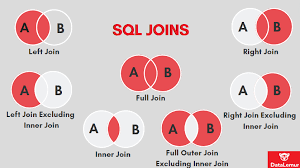


 `employee` and `department` tables in MySQL and insert some sample data:

### SQL Script
```sql
-- Create the Department table
CREATE TABLE Department (
    DepartmentID INT AUTO_INCREMENT PRIMARY KEY,
    DepartmentName VARCHAR(50) NOT NULL
);

-- Create the Employee table
CREATE TABLE Employee (
    EmployeeID INT AUTO_INCREMENT PRIMARY KEY,
    FirstName VARCHAR(50) NOT NULL,
    LastName VARCHAR(50) NOT NULL,
    Email VARCHAR(100) UNIQUE NOT NULL,
    HireDate DATE NOT NULL,
    Salary DECIMAL(10, 2) NOT NULL,
    DepartmentID INT,
    FOREIGN KEY (DepartmentID) REFERENCES Department(DepartmentID)
);

-- Insert data into Department table
INSERT INTO Department (DepartmentName)
VALUES
    ('Human Resources'),
    ('Engineering'),
    ('Marketing'),
    ('Sales');

-- Insert data into Employee table
INSERT INTO Employee (FirstName, LastName, Email, HireDate, Salary, DepartmentID)
VALUES
    ('John', 'Doe', 'john.doe@example.com', '2023-01-15', 60000.00, 1),
    ('Jane', 'Smith', 'jane.smith@example.com', '2022-05-22', 75000.00, 2),
    ('Alice', 'Johnson', 'alice.johnson@example.com', '2021-09-12', 50000.00, 3),
    ('Bob', 'Brown', 'bob.brown@example.com', '2020-11-30', 45000.00, 4),
    ('Charlie', 'Davis', 'charlie.davis@example.com', '2019-07-19', 70000.00, 2);
```

### Explanation
1. **Department Table**:
   - `DepartmentID`: Unique identifier for each department (Primary Key).
   - `DepartmentName`: Name of the department.

2. **Employee Table**:
   - `EmployeeID`: Unique identifier for each employee (Primary Key).
   - `FirstName`: First name of the employee.
   - `LastName`: Last name of the employee.
   - `Email`: Unique email address for the employee.
   - `HireDate`: Date the employee was hired.
   - `Salary`: Employee's salary.
   - `DepartmentID`: Foreign key referencing the `DepartmentID` in the `Department` table.

3. **Foreign Key Relationship**:
   - The `Employee` table references the `Department` table through the `DepartmentID` column.
Here’s a list of 25 commonly asked SQL queries and tasks based on the `Employee` and `Department` tables, along with their solutions:

---

### **Basic Queries**
1. **Retrieve all employees.**
   ```sql
   SELECT * FROM Employee;
   ```

2. **Retrieve all departments.**
   ```sql
   SELECT * FROM Department;
   ```

3. **Get employees hired after 2022.**
   ```sql
   SELECT * FROM Employee WHERE HireDate > '2022-01-01';
   ```

4. **Find the employee with the highest salary.**
   ```sql
   SELECT * FROM Employee ORDER BY Salary DESC LIMIT 1;
   ```

5. **List all employees with a specific department name (e.g., 'Engineering').**
   ```sql
   SELECT e.*
   FROM Employee e
   JOIN Department d ON e.DepartmentID = d.DepartmentID
   WHERE d.DepartmentName = 'Engineering';
   ```

---

### **Aggregate Queries**
6. **Count the total number of employees.**
   ```sql
   SELECT COUNT(*) AS TotalEmployees FROM Employee;
   ```

7. **Find the average salary of employees.**
   ```sql
   SELECT AVG(Salary) AS AverageSalary FROM Employee;
   ```

8. **List the total salary paid per department.**
   ```sql
   SELECT d.DepartmentName, SUM(e.Salary) AS TotalSalary
   FROM Employee e
   JOIN Department d ON e.DepartmentID = d.DepartmentID
   GROUP BY d.DepartmentName;
   ```

9. **Find the department with the highest number of employees.**
   ```sql
   SELECT d.DepartmentName, COUNT(e.EmployeeID) AS EmployeeCount
   FROM Employee e
   JOIN Department d ON e.DepartmentID = d.DepartmentID
   GROUP BY d.DepartmentName
   ORDER BY EmployeeCount DESC
   LIMIT 1;
   ```

10. **Calculate the minimum and maximum salary in each department.**
    ```sql
    SELECT d.DepartmentName, MIN(e.Salary) AS MinSalary, MAX(e.Salary) AS MaxSalary
    FROM Employee e
    JOIN Department d ON e.DepartmentID = d.DepartmentID
    GROUP BY d.DepartmentName;
    ```

---

### **Filtering and Searching**
11. **List employees earning more than $50,000.**
    ```sql
    SELECT * FROM Employee WHERE Salary > 50000;
    ```

12. **Retrieve employees whose first name starts with 'J'.**
    ```sql
    SELECT * FROM Employee WHERE FirstName LIKE 'J%';
    ```

13. **Find employees hired between 2020 and 2022.**
    ```sql
    SELECT * FROM Employee WHERE HireDate BETWEEN '2020-01-01' AND '2022-12-31';
    ```

14. **List employees not assigned to any department.**
    ```sql
    SELECT * FROM Employee WHERE DepartmentID IS NULL;
    ```

15. **Find employees with duplicate email addresses (if any).**
    ```sql
    SELECT Email, COUNT(*) AS Count
    FROM Employee
    GROUP BY Email
    HAVING Count > 1;
    ```

---

### **Joins**
16. **List all employees along with their department names.**
    ```sql
    SELECT e.FirstName, e.LastName, d.DepartmentName
    FROM Employee e
    LEFT JOIN Department d ON e.DepartmentID = d.DepartmentID;
    ```

17. **Find employees who do not belong to any department.**
    ```sql
    SELECT e.*
    FROM Employee e
    LEFT JOIN Department d ON e.DepartmentID = d.DepartmentID
    WHERE d.DepartmentID IS NULL;
    ```

18. **Retrieve departments with no employees.**
    ```sql
    SELECT d.*
    FROM Department d
    LEFT JOIN Employee e ON d.DepartmentID = e.DepartmentID
    WHERE e.EmployeeID IS NULL;
    ```

19. **List employees with their salary and department's total salary.**
    ```sql
    SELECT e.FirstName, e.Salary, d.DepartmentName, SUM(e2.Salary) AS TotalSalary
    FROM Employee e
    JOIN Employee e2 ON e.DepartmentID = e2.DepartmentID
    JOIN Department d ON e.DepartmentID = d.DepartmentID
    GROUP BY e.EmployeeID;
    ```

20. **Get department details where average salary exceeds $60,000.**
    ```sql
    SELECT d.DepartmentName, AVG(e.Salary) AS AverageSalary
    FROM Employee e
    JOIN Department d ON e.DepartmentID = d.DepartmentID
    GROUP BY d.DepartmentID
    HAVING AverageSalary > 60000;
    ```

---

### **Subqueries**
21. **Find employees earning more than the average salary.**
    ```sql
    SELECT * FROM Employee
    WHERE Salary > (SELECT AVG(Salary) FROM Employee);
    ```

22. **Retrieve the second-highest salary in the company.**
    ```sql
    SELECT MAX(Salary) AS SecondHighestSalary
    FROM Employee
    WHERE Salary < (SELECT MAX(Salary) FROM Employee);
    ```

23. **Find employees whose salary is greater than the average salary of their department.**
    ```sql
    SELECT e.*
    FROM Employee e
    WHERE e.Salary > (
        SELECT AVG(Salary)
        FROM Employee e2
        WHERE e2.DepartmentID = e.DepartmentID
    );
    ```

24. **List departments where no employee earns more than $70,000.**
    ```sql
    SELECT d.DepartmentName
    FROM Department d
    WHERE NOT EXISTS (
        SELECT 1
        FROM Employee e
        WHERE e.DepartmentID = d.DepartmentID AND e.Salary > 70000
    );
    ```

25. **Find the employee(s) who has been working for the longest time.**
    ```sql
    SELECT * FROM Employee
    WHERE HireDate = (SELECT MIN(HireDate) FROM Employee);
    ```

---

### **Tips for Interviews**
- Be clear about concepts like **Joins**, **Aggregate Functions**, **Subqueries**, **Window Functions**, and **Indexes**.
- Practice optimizing queries for better performance.
- Prepare to explain why certain queries are written in a specific way.

Let me know if you'd like explanations for any specific query!
